## Goodfellow et al's style of experiment

2 Tasks old and new. Random parameter search

e381cdfbb9c1c5aa358f89812abf7012eed6c6a2

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("./data/goodfellow.csv")

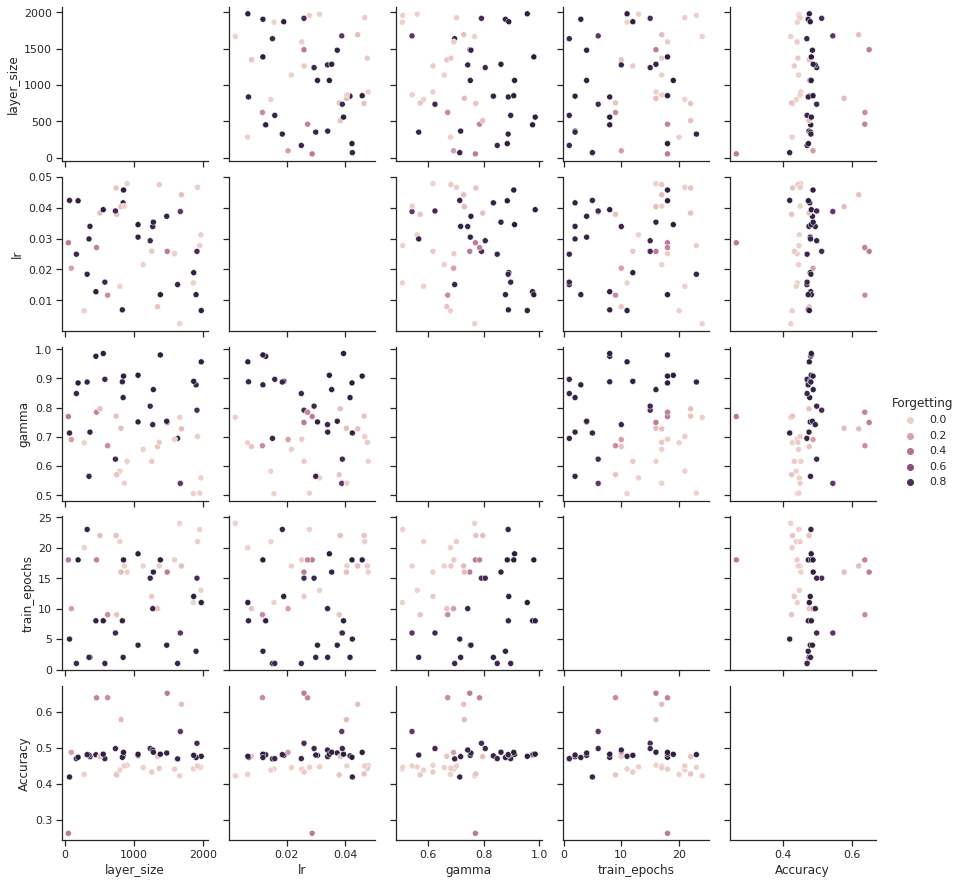

In [5]:
# data.s()
# pd.plotting.scatter_matrix(data, figsize=(20, 20), hue)
sns.set_theme(style="ticks")

sns.pairplot(data, hue="Forgetting", diag_kind="None")

# Conditioned Dropout

Using the best-ish parameters found earlier we use conditioned dropout

```py
def random_params():
    return {
        "lr": 0.02,
        "epochs": 10,
        "exponential_decay": 0.7,
        "layer_size": 1024,
        "p_active": np.random.uniform(0.0, 1.0),
        "p_inactive": np.random.uniform(0.0, 1.0),
    }
```

<AxesSubplot:xlabel='p_active', ylabel='p_inactive'>

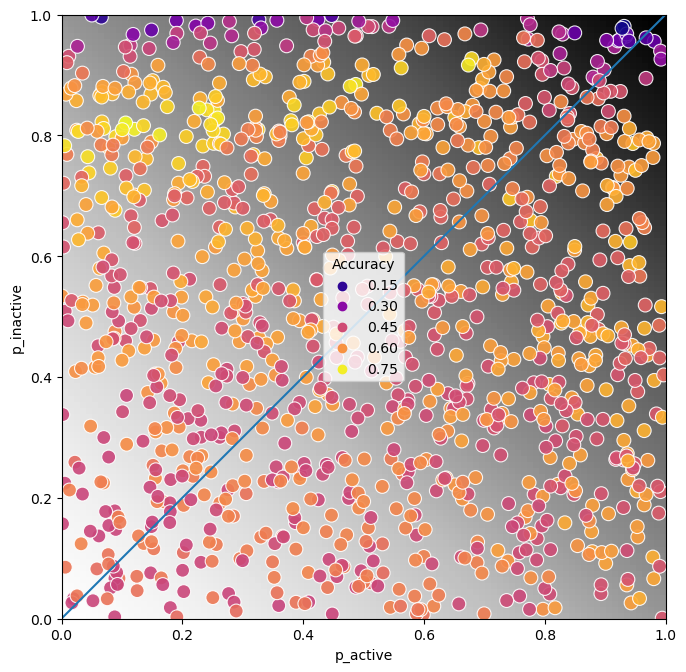

In [49]:
data = pd.read_csv("data/conditioned_dropout.csv")

accuracy = data["Accuracy"]

plt.figure(figsize=(8, 8), dpi=100)

# plt.axline((0, 0), slope=1)

res = 100
groups = 2
probability = np.array([[1/2 * p_active + 1/2 * p_inactive 
                         for p_inactive  in np.arange(0.0, 1.0, 1.0/res)] 
                         for p_active    in np.arange(0.0, 1.0, 1.0/res)])

probability = np.flip(probability, 0)


accuracy  = data["Accuracy"]

plt.axline((0,0), slope=1)
plt.imshow(probability, extent=(0, 1, 0, 1), cmap="Greys")
sns.scatterplot(data=data, x="p_active", y="p_inactive",
                hue="Accuracy", palette="plasma", s=100, alpha=0.9)
# sns.scatterplot(data=data, x="p_inactive", y="p_active",
#                 hue="Accuracy", palette="plasma", s=30, hue_norm=(0.4, accuracy.max()))

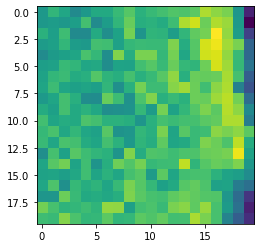

In [97]:
# heatmap, _, _  = np.histogram2d(data["p_active"], data["p_inactive"], bins=10)
bins = 20
data = pd.read_csv("data/conditioned_dropout.csv")

data["p_active"] =  pd.cut(data["p_active"], bins, labels=range(bins))
data["p_inactive"] =  pd.cut(data["p_inactive"], bins, labels=range(bins))


data = data.groupby(["p_active", "p_inactive"]).mean()["Accuracy"].unstack()
data



plt.imshow(data.interpolate(axis=0).interpolate(axis=1))

<AxesSubplot:xlabel='OldTaskErr', ylabel='NewTaskErr'>

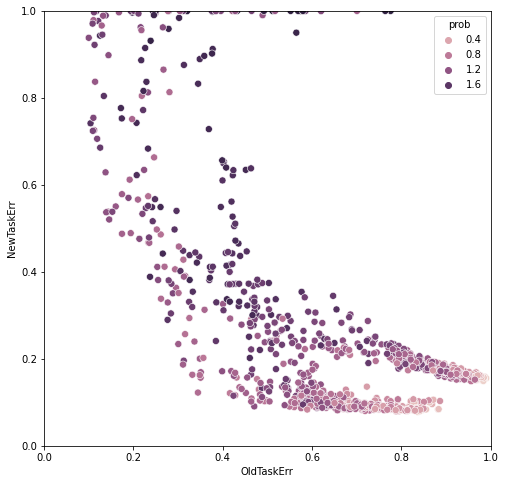

In [30]:
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.ylim(0, 1)

data["NewTaskErr"] = 1 - data["NewTask"]
data["OldTaskErr"] = 1 - data["OldTask"]

data["prob"] = data["p_active"] + data["p_inactive"]


sns.scatterplot(data=data, x="OldTaskErr", y="NewTaskErr", hue="prob" ,s=50)